<h1 align="center">Линейная регрессия</h1>

<h1 style="color:#008B8B">1. Линейные модели</h1>

Такие модели сводятся к суммированию значений признаков с некоторыми весами:

$\large a(x) = w_0 + \sum\limits_{j=1}^d w_j x_j$

Параметрами модели являются веса или коэффициенты $w_j$. Вес $w_0$ также называется
свободным коэффициентом или сдвигом (bias).

Добавим фиктивный признак равный $1$, тогда запись можно упросить до следующего вида:

$\large a(x) = \sum\limits_{j=0}^d w_j x_j$

$\large a(x) = \langle w, x \rangle$

<h1 style="color:#008B8B">2. Область применимости линейных моедлей</h1>

Сформулируем задачу: 

$x$ - кваритра в Москве;

$y$ - рычночная стоимость.

$\large a(x) = w_0 + w_1 \text{(площадь)} + w_2\text{(количество комнат)} + w_3 \text{(расстояние до метро)}$

Проблема модели заключается в том, что признаки независимо влияют на стоимость квартиры. Если увеличиваетя площадь квартиры, то цена увеличивается только засчёт площади квартиры в линейном виде, при этом растрояние до метро и все остальные признаки не оказывают влияния.
Например, если квартира расположена близко от метро, то цена должна увеличиваться быстрее при росте площади.

### 1) Категориальные признаки

$x_j$ - категориальные признаки

$C = \{c_1, \ldots, c_m\}$ - множество значений признака

Заменим на $m$ бинарных признаков $b_1(x), \ldots, b_m(x)$, где $b_i(x) = [x_j = c_i]$.

При этом, признаки $b_1(x), \ldots, b_m(x)$ являются линейно зависимыми: 

$b_1(x) + \ldots + b_m(x) = 1$

И модель принимает следующий вид:

$\large a(x) = w_0 + w_1 [x_j = c_1] + \ldots + w_m [x_j = c_m] + \text{\{Взаимодействие других признаков\}}$

После этого, для каждого района Москвы будет свой коэффицент, своя добавка.

### 2) Бинаризация числовых признаков

На графике видно, что цена квартиры имеет максимальную стоимость, если расположены на относительном расстоянии от метро. Если же квартира очень близко или далекто от метро, тогда стоимость начинает падать:

<img src="img/2_1.png">

Если обучать модель линейной регресси, тогда этот признак будет иметь вид $w_3 \cdot \text{(расстояние до метро)}$. Тогда модель предпологает, чем дальше расстояние до метро, тем больше цена или если $-w$ отрицателен, тогда чем больше расстояние до метро, тем ниже цена.

Но на графике зависимость целевовй переменной совершенно другая. Линейная модель не способна учитывать такую форму распределения.Чтобы это произошло, необходимо применить бинаризацию числовых признаков, а именно, разобъём множество значений признака на бины:

<img src="img/2_2.png">

Возьмем множество значений признака и разобъем на некоторое количество бинов. Для этого выберем некоторую сетку точек $\{t_1, \ldots, t_m\}$ (пороги). Это может быть равномерная сетка между минимальным и максимальным значением признака или, например, сетка из эмпирических квантилей. Добавим сюда точки $t_0 = -\infty$ и $t_{m+1} = +\infty$. Новые признаки зададим как

$b_i(x)
=
[t_{i - 1} < x_j \leq t_{i}],
\quad
i = 1, \dots, m+1.$


Линейная модель над этими признаками будет выглядеть как

$a(x)
=
w_1 [t_{0} < x_j \leq t_{1}]
+
\dots
+
w_{m+1} [t_{m} < x_j \leq t_{m+1}]
+
\dots$

Тогда, для каждого диапозона растояний до метро будет своя прибавка или вычет к общему прогноозу стоимости квартиры. 

<h1 style="color:#008B8B">3. Измерение ошибки в задачах регрессии</h1>

### 1) MSE

$\large L(y, a) = (a - y)^2$

$\large \text{MSE}(a, X) = \frac{1}{\ell} \sum\limits_{i=1}^{\ell} (a(x_i) - y_i)^2$

### 2) MAE

$\large L(y, a) = |a - y|$

$\large \text{MAE}(a, X) = \frac{1}{\ell} \sum\limits_{i=1}^{\ell} |a(x_i) - y_i|$

**MAE vs MSE**

Предположим, у нас имеются фактические значения объекта $y$ и предсказание модеи $a(x)$:

|$$y$$     |$$a(x)$$ |$$|a(x) - y|$$ |$$(a(x)-y)^2$$|
|:--------:|:-------:|:-------------:|:------------:|
|1         |2        |1              |1             |
|1000      |2        |998            |996004        |

Если изменить веса модели так, чтобы прогноз сталы на еденицу ближе к ответу для каждого объекта:

|$$y$$     |$$a(x)$$ |$$|a(x) - y|$$ |$$(a(x)-y)^2$$|
|:--------:|:-------:|:-------------:|:------------:|
|1         |1        |0              |0             |
|1000      |3        |997            |994009        |

Изменив прогноз на еденицу, ошибка для $\text{MSE}$ на втором объекте уменьшилась на $2000$, а для $\text{MAE}$ ошибка уменьшилась на еденицу. Это говорит о том, что модель для уменьшения функционала ошибки будет подбирать веса так, чтобы минимизировать отклонения на выбросах. Для $MSE$ выгоднее уменьшить ошибку на выборсе и увеличить ошибку на остальных объектах, нежели иначе, это связано с тем, что квадрат сильнее штрафует за большие отклонения.


В случае $\text{MAE}$ ошибка на двух объекта изменилась только на еденицу, что говорит о устойчивости модели к выбросам, так как для $\text{MAE}$ не важно для каких объектов изменять веса, штраф будет одинаковым.

**Градиентный спуск**

Для $\text{MSE}$ производная будет тем меньше, чем ближе мы к нулю, что позволяет делать все меньший шаг и не перескочить минимум. 

Для $\text{MAE}$ значение производная одинаково по масштабу, независимо в какой точке мы находимся. Значит шаг будет всюду одинаковый и мы можем прешагнуть минимум функции. Делаем выводы, что производная $\text{MAE}$ не содержит информации о близости к экстремуму. 

### 3) MAPE

$\large L(y, a) = \big| \frac{y-a}{y} \big|$

Соответствующий функционал называется средней абсолютной процентной ошибкой $\text{(mean absolute percentage error, MAPE)}$:

$\large \text{MAPE}(a, X) = \frac{1}{\ell} \sum\limits_{i=1}^{\ell} \bigg|\frac{y_i - a(x_i)}{y_i} \bigg|$

Это обычно используется при прогназировании запасов товаров. В магазине имеются разные товары, некоторые продаются еденицами в день, а другие тысячами в день. Есили считать средний модуль отклонений, тогда товары, которые продаются больше, будут больший вклад вносить в среднее или сумму. А при использовании $MAPE$, товары будут вносить равный вклад независимо от количество продаваемых едениц.

У этой функции потреь имеется проблема несимметричности. Если $y=1$, тогда худший недопрогноз равен $a = 0$. В этом случае значение функции потерь будет равно $L = 1$. Если же сильное завышение прогноза $a = 1000$, тогда функция потерь будет равна $L = 999$. Следовательно, для недопрогноза значение ошибки ограничено снизу $1$, а для перепрогноза значение ошибки не ограничено сверху.

Это исправляется в симметричной модификации $\text{(symmetric mean absolute percentage error, SMAPE)}$:

$\large L(y, a) = \frac{|y - a|}{(|y| + |a|) / 2}$

Для этой функци потерь можно проверить, что максимум недопрогноза и препрогноза одинаковый.

### Визуализируем фукнции потерь

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
%config InlineBackend.figure_format = 'png'

In [12]:
def mae(a, y):
    return np.abs(y - a)

def mape(a, y):
    return np.abs((y - a) / y)

def smape(a, y):
    return np.abs(y - a) / ((np.abs(y) + np.abs(a)) / 2)

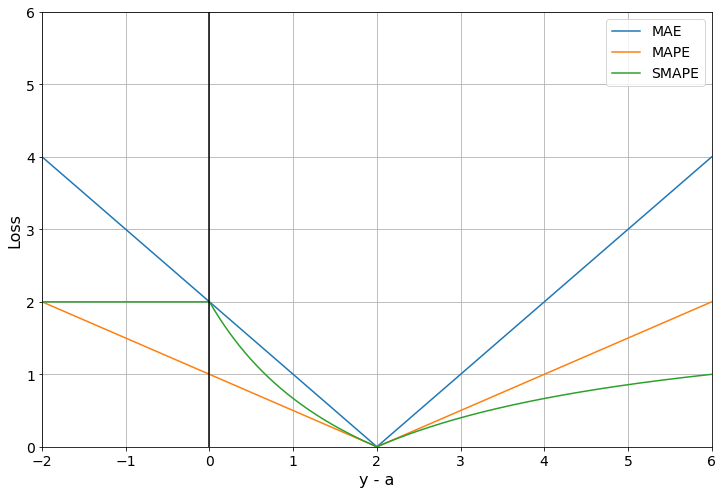

In [13]:
plt.figure(figsize=(12, 8))
plt.tick_params(axis='both', which='major', labelsize=14)

y = 2  # Значение целевой переменной

# MAE
a_data = np.linspace(-4, 6, 1000) # Предсказание модели
mae_loss = [mae(a, y) for a in a_data]
plt.plot(a_data, mae_loss, label='MAE')

# MAPE
a_data = np.linspace(-4, 6, 1000)
mape_loss = [mape(a, y) for a in a_data]
plt.plot(a_data, mape_loss, label='MAPE')

# SMAPE
a_data = np.linspace(-4, 6, 1000)
smape_loss = [smape(a, y) for a in a_data]
plt.plot(a_data, smape_loss, label='SMAPE')

plt.vlines(0, 0, 6, 'black')
plt.xlabel('y - a', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.xlim(-2, 6)
plt.ylim(0, 6)
plt.legend(fontsize=14)
plt.grid()
plt.show()

При этом у $\text{MAPE}$ при разном значении целевой переменной, наклон кривой будет разным. Для небольших значений штраф более значителен, а с увеличением значения целевой переменной штраф уменьшается.

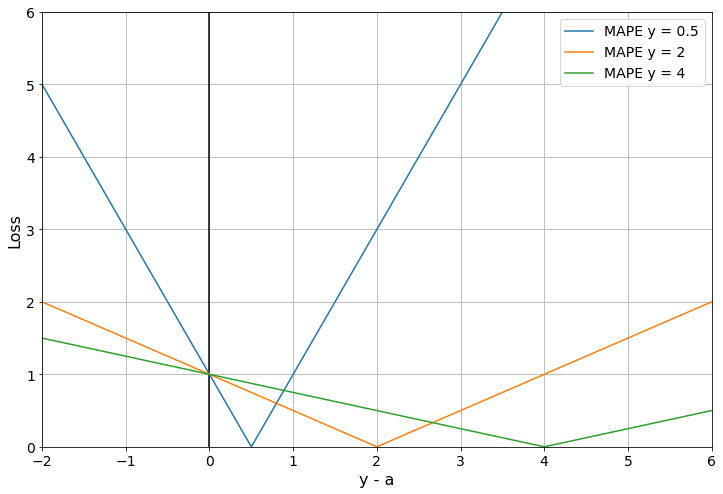

In [320]:
plt.figure(figsize=(12, 8))
plt.tick_params(axis='both', which='major', labelsize=14)

for y in [0.5, 2, 4]:    
    # MAPE
    a_data = np.linspace(-4, 6, 1000)
    mape_loss = [mape(a, y) for a in a_data]
    plt.plot(a_data, mape_loss, label=f'MAPE y = {y}')


plt.vlines(0, 0, 6, 'black')
plt.xlabel('y - a', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.xlim(-2, 6)
plt.ylim(0, 6)
plt.legend(fontsize=14)
plt.grid()
plt.show()

<h3 style="color:#2E8B57">Задача № 1</h3>

Представьте, что мы решаем задачу предсказания времени в минутах на дорогу из одной точки в другую на основе характеристик маршрута. Есть два требования к тому, как мы штрафуем модель за ошибки:

1. Ошибки менее $10\%$ штрафоваться не должны.

2. Чем больше ошибка, тем больше она должна штрафоваться.

3. Штраф за занижение прогноза на $\delta$ по сравнению с правильным ответом должен быть в два раза сильнее, чем штраф за завышение прогноза на $\delta$ для любого $\delta > 0$

Предложите функцию потерь, которая удовлетворяет этим двум требованиям:

<h4 align='center'>Решение 1:</h4>

$\delta$ была нужна чтобы показать, если ошибка за завышения прогноза равна $\delta$, тогда за занижение прогноза на такую же величину, ошибка должна быть в два раза больше.

$\begin{equation*}
L(y, a) = 
 \begin{cases}
   0 & |y - a| < 0.1y \\ 
   2|y - a| & a \le 0.9 y \\
   |y - a| & a \ge 1.1 y
 \end{cases}
\end{equation*}$

In [206]:
def my_fun(a, y):
    if abs(y - a) < 0.1 * y:
        return 0
    if a <= 0.9 * y:
        return 2 * abs(y -a)
    if a >= 1.1 * y:
        return abs(y - a)

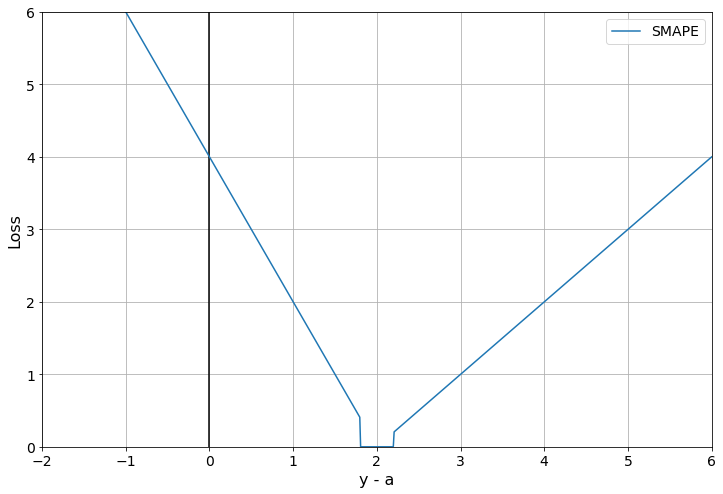

In [209]:
plt.figure(figsize=(12, 8))
plt.tick_params(axis='both', which='major', labelsize=14)

y = 2  # Значение целевой переменной

# MY
a_data = np.linspace(-4, 6, 1000)
smape_loss = [my_fun(a, y) for a in a_data]
plt.plot(a_data, smape_loss, label='SMAPE')

plt.vlines(0, 0, 6, 'black')
plt.xlabel('y - a', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.xlim(-2, 6)
plt.ylim(0, 6)
plt.legend(fontsize=14)
plt.grid()
plt.show()

<h4 align='center'>Решение 2:</h4>

$\left\{ 
  \begin{gathered} 
    0, \text{ если} &
    \left[
      \begin{gathered} 
        (y - a) < 0.1 y \quad \text{and} \quad y \ge a, \hfill 
        \\ 
        (a  - y) < 0.1 y \quad \text{and} \quad y < a, \hfill 
        \\ 
      \end{gathered} 
    \right. \hfill \\ 
    y - a, \text{ если} & y > a \quad \text{and} \quad (y - a) \ge 0.1 y \\ 
    \frac{a - y}{2}, \text{ если} & y \le a \quad \text{and} \quad (a - y) \ge 0.1 y
  \end{gathered} 
\right.$

In [235]:
def my_fun(a, y):
    if (y - a) < 0.1 * y and y >= a:
        return 0
    if (a - y) < 0.1 * y and y < a:
        return 0
    if y > a and (y - a) >= 0.1 * y:
        return y - a
    if y <= a and (a - y) >= 0.1 * y:
        return (a - y) / 2

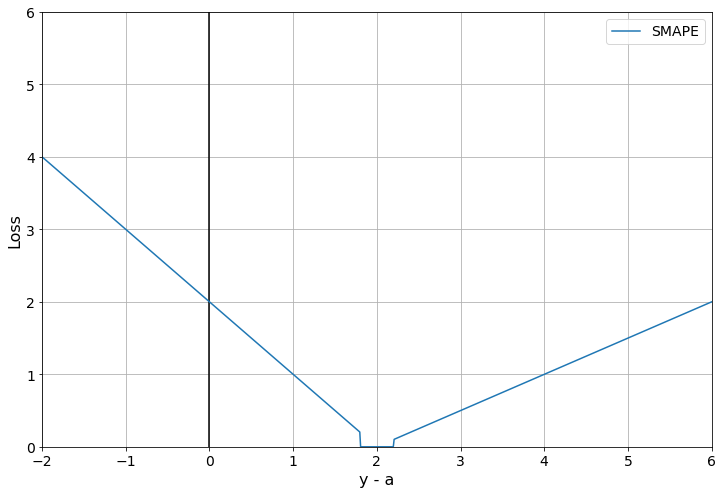

In [236]:
plt.figure(figsize=(12, 8))
plt.tick_params(axis='both', which='major', labelsize=14)

y = 2  # Значение целевой переменной

# MY
a_data = np.linspace(-4, 6, 1000)
smape_loss = [my_fun(a, y) for a in a_data]
plt.plot(a_data, smape_loss, label='SMAPE')

plt.vlines(0, 0, 6, 'black')
plt.xlabel('y - a', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.xlim(-2, 6)
plt.ylim(0, 6)
plt.legend(fontsize=14)
plt.grid()
plt.show()